# Общая информация


### О задании

Предскажем пользовательскую оценку отеля по тексту отзыва. Обучимся на данных с кэггла и отправим в [предикт](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c). Там же скачаем данные.

Рассмотрим отзывы по 1500 отелям из совершенно разных уголков мира. Нам дан текст отзыва и пользовательская оценка отеля. Наша задача - научиться предсказывать оценку отеля по отзыву.

Главная метрика - Mean Absolute Error (MAE)

### Цель

Цель нашего проекта — разработать модель машинного обучения, которая сможет точно и достоверно оценить рейтинг отеля по тексту отзыва.

Мы использовали инструменты и методы: Python, pandas, scikit-learn, PyTorch, а также различные методы анализа данных, предварительную обработку данных, обработку текста, машинное обучение.

Результаты, которые мы получили, представляют собой оценки MAE различных моделей на проверочных и тестовых наборах.

Объяснение того, почему мы получили такие результаты и почему мы решили использовать такие методы, основано на характеристиках данных, предположениях модели, сложности модели, интерпретируемости модели и обобщении модели.

### План

- Выполним анализ данных и предварительную обработку, например удаление пропущенных значений, выбросов, дубликатов и нерелевантных объектов.

- Разделите данные на обучение и проверку и применим методы обработки текста, такие как токенизация, лемматизация, удаление стоп-слов и векторизация.

- Обучим и оценим различные модели машинного обучения, используя среднюю абсолютную ошибку (MAE) в качестве основного показателя.

- Выберите лучшую модель на основе проверки MAE и протестируйте ее на неизвестных данных.

### Про данные:
Каждое ревью состоит из двух текстов: positive и negative - плюсы и минусы отеля. В столбце score находится оценка пользователя - вещественное число 0 до 10. Извлечем признаки из этих текстов и предскажем по ним оценку.

Для локального тестирования используйте предоставленное разбиение на трейн и тест


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from scipy.sparse import hstack
from sklearn.metrics import mean_absolute_error as MAE
import numpy as np
from tqdm.notebook import tqdm

In [22]:
PATH_TO_TRAIN_DATA = 'train.csv'

In [23]:
import pandas as pd

df = pd.read_csv(PATH_TO_TRAIN_DATA)
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7


Предобработка текста может сказываться на качестве модели.
Сделаем небольшой препроцессинг текстов: удалим знаки препинания, приведем все слова к нижнему регистру.

Также мы добавили разбиение текстов на токены. Теперь каждая строка-ревью стала массивом токенов.

In [24]:
# Import the string module
import string

# Import the nltk module
import nltk

# Download the punkt tokenizer
nltk.download('punkt')

# Import the word_tokenize function
from nltk.tokenize import word_tokenize

# Define a function to process text
def process_text(text):
    # Check if the text is a string
    if type(text) != str:
        # Print the type of the text
        print(type(text))
    # Return a list of words without punctuation and in lower case
    return [word for word in word_tokenize(text.lower()) if word not in string.punctuation]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
df['negative'] = df['negative'].apply(process_text)
df['positive'] = df['positive'].apply(process_text)

In [26]:
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,"[there, were, issues, with, the, wifi, connect...","[no, positive]",7.1
1,00004d18f186bf2489590dc415876f73,"[tv, not, working]","[no, positive]",7.5
2,0000cf900cbb8667fad33a717e9b1cf4,"[more, pillows]","[beautiful, room, great, location, lovely, staff]",10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,"[very, business]",[location],5.4
4,00025e1aa3ac32edb496db49e76bbd00,"[rooms, could, do, with, a, bit, of, a, refurb...","[nice, breakfast, handy, for, victoria, train,...",6.7


In [27]:
df_train, df_valid = train_test_split(df, random_state=1412) # <- для локального тестирования

### Часть 1

Обучим логистическую или линейную регрессию на TF-IDF векторах текстов.

In [ ]:
stop_words = ['for', 't', 'the', 'an', 'and', 'a', 'of', 'at', 'by', 'on']

In [ ]:
# Import the TfidfVectorizer class
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object for positive reviews
# Use lambda functions for preprocessor and tokenizer
# Use stop_words as a parameter
tfidf_pos = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x, stop_words=stop_words)

# Create a TfidfVectorizer object for negative reviews
# Use the same parameters as tfidf_pos
tfidf_neg = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x, stop_words=stop_words)

# Fit and transform the positive reviews in the training set
matrix_pos_train = tfidf_pos.fit_transform(df_train['positive'])

# Fit and transform the negative reviews in the training set
matrix_neg_train = tfidf_neg.fit_transform(df_train['negative'])

# Transform the positive reviews in the validation set
matrix_pos_valid = tfidf_pos.transform(df_valid['positive'])

# Transform the negative reviews in the validation set
matrix_neg_valid = tfidf_neg.transform(df_valid['negative'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'd', 'e', 'f', 'h', 'n', 'o', 'r', 'y'] not in stop_words.
  warnings.warn(


In [ ]:
X_train = hstack([matrix_pos_train, matrix_neg_train])
y_train = df_train['score']
X_valid = hstack([matrix_pos_valid, matrix_neg_valid])
y_valid = df_valid['score']

In [ ]:
# Import the numpy module
import numpy as np

# Import the Ridge class
from sklearn.linear_model import Ridge

# Import the mean absolute error function
from sklearn.metrics import mean_absolute_error as MAE

# Create an empty list to store the scores
scores = []

# Create an array of alpha values from 1 to 3 with 9 elements
alphas = np.linspace(1, 3, 9)

# Loop over the alpha values
for i in alphas:
    # Create a Ridge object with the current alpha value
    lin_reg = Ridge(alpha=i)
    # Fit the model on the training data
    lin_reg.fit(X_train, y_train)
    # Predict the validation data
    pred_valid = lin_reg.predict(X_valid)
    # Calculate the mean absolute error and append it to the scores list
    scores.append(MAE(y_valid, pred_valid))

# Find the index of the minimum score
best_index = np.argmin(scores)

# Find the corresponding alpha value
best_alpha = alphas[best_index]

# Print the best alpha value
print(best_alpha)


3.0


In [ ]:
lin_reg = Ridge(alpha=best_alpha)
lin_reg.fit(X_train, y_train)
pred_valid = lin_reg.predict(X_valid)

In [ ]:
print(f'MAE: {MAE(y_valid, pred_valid)}')

MAE: 0.8259715650219923


Предскажем этой моделью тестовые данные из [соревнования](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c)

In [ ]:
PATH_TO_TEST_DATA = 'test.csv'
df_test = pd.read_csv(PATH_TO_TEST_DATA)
df_test['negative'] = df_test['negative'].apply(process_text)
df_test['positive'] = df_test['positive'].apply(process_text)
df_test.head()

,review_id,negative,positive
0,00026f564b258ad5159aab07c357c4ca,"[other, than, the, location, everything, else,...","[just, the, location]"
1,000278c73da08f4fcb857fcfe4ac6417,"[no, uk, tv, but, this, was, a, minor, point, ...","[great, location, very, comfortable, clean, br..."
2,000404f843e756fe3b2a477dbefa5bd4,"[a, tiny, noisy, room, very, deceptively, phot...","[the, breakfast, booked, the, preceding, night..."
3,000a66d32bcf305148d789ac156dd512,"[noisy, various, electrical, devices, kicking,...","[great, location, nice, bathroom]"
4,000bf1d8c5110701f459ffbedbf0d546,"[no, negative]","[great, location, and, friendly, staff]"


In [ ]:
matrix_pos_test = tfidf_pos.transform(df_test['positive'])
matrix_neg_test = tfidf_neg.transform(df_test['negative'])

X_test = hstack([matrix_pos_test, matrix_neg_test])

In [ ]:
answer = pd.DataFrame()
answer['review_id'] = df_test.review_id
answer['score'] = lin_reg.predict(X_test)
answer.shape

(20000, 2)

In [ ]:
answer

,review_id,score
0,00026f564b258ad5159aab07c357c4ca,4.805953
1,000278c73da08f4fcb857fcfe4ac6417,9.663932
2,000404f843e756fe3b2a477dbefa5bd4,7.186893
3,000a66d32bcf305148d789ac156dd512,7.428128
4,000bf1d8c5110701f459ffbedbf0d546,9.273842
...,...,...
19995,ffe8a7190aee6e3a53ee2e0145a91555,6.612448
19996,ffea0e2b84788c9df755efe8e2bedb23,9.455659
19997,fff3997a85a1eed7ae7a937bc945fcf0,9.759958
19998,fff673fe95ab8f3a0910f112549862e2,7.592689


In [ ]:
answer.to_csv('test_1.csv', index=False)

### Часть 2

Обучим логистическую или линейную регрессию на просуммированных Word2Vec векторах. Мы используем суммирование вместо усреднения, так как это дает вклад о размере сообщения, который влияет на оценку, то есть чем больше размер положительного отзыва, тем больше вероятность что оценка выше, и наоборот.

In [ ]:
import multiprocessing
from gensim.models import Word2Vec

In [ ]:
cores = multiprocessing.cpu_count()

In [ ]:
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,"[there, were, issues, with, the, wifi, connect...","[no, positive]",7.1
1,00004d18f186bf2489590dc415876f73,"[tv, not, working]","[no, positive]",7.5
2,0000cf900cbb8667fad33a717e9b1cf4,"[more, pillows]","[beautiful, room, great, location, lovely, staff]",10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,"[very, business]",[location],5.4
4,00025e1aa3ac32edb496db49e76bbd00,"[rooms, could, do, with, a, bit, of, a, refurb...","[nice, breakfast, handy, for, victoria, train,...",6.7


In [ ]:
# Define a function to get word2vec embeddings for a given type of data
def get_word2vec_embeddings(vectors, data, _type, vect_size, generate_missing=False):
    # Apply the get_average_word2vec function to each row of the data
    # Pass the vectors, generate_missing and k parameters
    embeddings = data[_type].apply(lambda x: get_average_word2vec(x, vectors.wv,
                                        generate_missing=generate_missing, k=vect_size))
    # Return the embeddings as a list
    return list(embeddings)

# Define a function to get the average word2vec vector for a list of tokens
def get_average_word2vec(tokens_list, get_vector, generate_missing, k):
    # Check if the tokens list is empty
    if len(tokens_list) < 1:
        # Return a zero vector of size k
        return np.zeros(k)
    # Generate a random or zero vector for missing words
    miss_vect = np.random.rand(k) if generate_missing else np.zeros(k)
    # Get the word2vec vector for each word in the tokens list
    # Use the miss_vect for words not in the get_vector
    vectorized = [get_vector[word] if word in get_vector else miss_vect for word in tokens_list]
    # Sum up the vectors along the axis 0
    sum_vectorized = np.sum(vectorized, axis=0)
    # Return the sum vector
    return sum_vectorized

In [ ]:
sz = 725

In [ ]:
w2v_model_positive = Word2Vec(sentences=df['positive'].values,
                    window=2,
                    vector_size=sz,
                    workers=cores-1,
                    epochs = 33)

In [ ]:
w2v_model_negative = Word2Vec(sentences=df['negative'].values,
                    window=2,
                    vector_size=sz,
                    workers=cores-1,
                    epochs = 33
                    )

In [ ]:
df_w2c = df.copy()
emb_pos = get_word2vec_embeddings(w2v_model_positive, df_w2c, 'positive', sz)
emb_neg = get_word2vec_embeddings(w2v_model_negative, df_w2c, 'negative', sz)

In [ ]:
df_neg = pd.DataFrame(emb_neg)
df_pos = pd.DataFrame(emb_pos)

In [ ]:

df_w2c = pd.concat([df_w2c, df_neg, df_pos], axis=1).drop(columns=['negative', 'positive'])
df_w2c.head()

,review_id,score,0,1,2,3,4,5,6,7,...,715,716,717,718,719,720,721,722,723,724
0,00003c6036f30f590c0ac435efb8739b,7.1,-2.442078,-1.209506,0.437380,1.759543,0.893531,2.082694,0.174943,-0.065647,...,0.499908,-0.330649,0.077121,-0.671696,-0.394845,0.444297,-0.046710,-0.087791,0.847682,-0.205708
1,00004d18f186bf2489590dc415876f73,7.5,-0.060631,-0.071485,-1.721504,0.650362,0.126053,-0.978357,0.742710,0.133865,...,0.499908,-0.330649,0.077121,-0.671696,-0.394845,0.444297,-0.046710,-0.087791,0.847682,-0.205708
2,0000cf900cbb8667fad33a717e9b1cf4,10.0,0.052343,-0.053984,-0.708932,0.935318,1.240195,0.175006,-1.995312,0.428946,...,-1.645976,1.406691,-0.879042,1.569071,-1.717103,0.936050,1.684610,1.279064,-0.410860,1.495758
3,0000df16edf19e7ad9dd8c5cd6f6925e,5.4,-0.092280,1.046016,0.204944,-0.771809,0.213589,0.862481,-1.391914,0.107254,...,-0.209332,0.371997,-0.217312,0.467764,0.249862,-0.023887,-0.033095,0.475175,-0.341235,0.239132
4,00025e1aa3ac32edb496db49e76bbd00,6.7,-1.619322,-1.178722,-0.394907,8.694915,-3.998725,-2.778957,1.548450,4.616735,...,-5.024252,4.768576,-2.874525,6.856267,-0.873852,0.693718,-4.729021,4.392199,0.136943,1.256639


In [ ]:
df_train, df_valid = train_test_split(df_w2c, random_state=1412) # <- для локального тестирования

In [ ]:
X_train = df_train.drop(columns=['score', 'review_id'])
X_valid = df_valid.drop(columns=['score', 'review_id'])
y_train = df_train['score']
y_valid = df_valid['score']

In [ ]:
best_alpha=0

In [ ]:
lin_reg = Ridge(alpha = best_alpha)
lin_reg.fit(X_train, y_train)
pred_valid = lin_reg.predict(X_valid)

In [ ]:
print(f'MAE: {MAE(y_valid, pred_valid)}')

MAE: 0.8952643946526686


#### Тестируем

In [ ]:
PATH_TO_TEST_DATA = 'test.csv'
df_test = pd.read_csv(PATH_TO_TEST_DATA)
df_test['negative'] = df_test['negative'].apply(process_text)
df_test['positive'] = df_test['positive'].apply(process_text)
df_test.head()

,review_id,negative,positive
0,00026f564b258ad5159aab07c357c4ca,"[other, than, the, location, everything, else,...","[just, the, location]"
1,000278c73da08f4fcb857fcfe4ac6417,"[no, uk, tv, but, this, was, a, minor, point, ...","[great, location, very, comfortable, clean, br..."
2,000404f843e756fe3b2a477dbefa5bd4,"[a, tiny, noisy, room, very, deceptively, phot...","[the, breakfast, booked, the, preceding, night..."
3,000a66d32bcf305148d789ac156dd512,"[noisy, various, electrical, devices, kicking,...","[great, location, nice, bathroom]"
4,000bf1d8c5110701f459ffbedbf0d546,"[no, negative]","[great, location, and, friendly, staff]"


In [ ]:
df_w2c = df_test.copy()
emb_pos = get_word2vec_embeddings(w2v_model_positive, df_w2c, 'positive', sz)
emb_neg = get_word2vec_embeddings(w2v_model_negative, df_w2c, 'negative', sz)

In [ ]:
df_neg = pd.DataFrame(emb_neg)
df_pos = pd.DataFrame(emb_pos)

In [ ]:
df_w2c = pd.concat([df_w2c, df_neg, df_pos], axis=1).drop(columns=['negative', 'positive'])

In [ ]:
X_test = df_w2c.drop(columns=['review_id'])

In [ ]:
answer = pd.DataFrame()
answer['review_id'] = df_test.review_id
answer['score'] = lin_reg.predict(X_test)
answer.shape

(20000, 2)

In [ ]:
answer

,review_id,score
0,00026f564b258ad5159aab07c357c4ca,5.498081
1,000278c73da08f4fcb857fcfe4ac6417,10.180064
2,000404f843e756fe3b2a477dbefa5bd4,7.267730
3,000a66d32bcf305148d789ac156dd512,7.788944
4,000bf1d8c5110701f459ffbedbf0d546,9.209064
...,...,...
19995,ffe8a7190aee6e3a53ee2e0145a91555,8.216730
19996,ffea0e2b84788c9df755efe8e2bedb23,9.940642
19997,fff3997a85a1eed7ae7a937bc945fcf0,9.979552
19998,fff673fe95ab8f3a0910f112549862e2,7.601756


In [ ]:
answer.to_csv('test_2.csv', index=False)

Усредняя w2v вектора, мы предполагаем, что каждое слово имеет равноценный вклад в смысл предложения, однако это может быть не совсем так. Попробуем воспользоваться другой концепцией и перевзвесить слова при получении итогового эмбеддинга текста. В качестве весов используйте IDF (Inverse document frequency)

In [ ]:
tfidf_pos = TfidfVectorizer(preprocessor=lambda x:x, tokenizer=lambda x:x)
tfidf_neg = TfidfVectorizer(preprocessor=lambda x:x, tokenizer=lambda x:x)

matrix_pos_train = tfidf_pos.fit_transform(df['positive'])
matrix_neg_train = tfidf_neg.fit_transform(df['negative'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
def calc_idf(tfidf_vect):
    return pd.Series(dict(zip(tfidf_vect.get_feature_names_out(), tfidf_vect.idf_)))

In [ ]:
idfs_neg = calc_idf(tfidf_neg)
idfs_pos = calc_idf(tfidf_pos)

In [ ]:
# Define a function to get the weighted word2vec vector for a list of tokens
def get_weighted_word2vec(tokens_list, get_vector, idfs, generate_missing=False, k=300):
    # Check if the tokens list is empty
    if len(tokens_list) < 1:
        # Return a zero vector of size k
        return np.zeros(k)
    # Generate a random or zero vector for missing words
    miss_vect = np.random.rand(k) if generate_missing else np.zeros(k)
    # Get the word2vec vector for each word in the tokens list
    # Use the miss_vect for words not in the get_vector
    vectorized = [get_vector[word] if word in get_vector else miss_vect for word in tokens_list]
    # Convert the vectorized list to a numpy array
    vectorized = np.array(vectorized)
    # Get the length of the tokens list
    length = len(tokens_list)
    # Get the idf values for each word in the tokens list
    # Reshape the idf array to match the vectorized array
    idf_vect = np.repeat(np.array(idfs[tokens_list]).reshape(length, 1), k, axis=1)
    # Multiply the idf array and the vectorized array element-wise
    # Sum up the resulting array along the axis 0
    weighted_w2v = np.sum(idf_vect * vectorized, axis=0)
    # Return the weighted word2vec vector
    return weighted_w2v

# Define a function to get the weighted word2vec embeddings for a given type of data
def get_weighted_word2vec_embeddings(vectors, data, _type, idfs, size, generate_missing=False):
    # Apply the get_weighted_word2vec function to each row of the data
    # Pass the vectors, idfs, generate_missing and k parameters
    embeddings = data[_type].apply(lambda x: get_weighted_word2vec(x, vectors.wv, idfs,
                                                                                generate_missing=generate_missing, k=size))
    # Return the embeddings as a list
    return list(embeddings)

In [ ]:
df_w2v_w = df.copy()

emb_neg = get_weighted_word2vec_embeddings(w2v_model_negative, df_w2v_w, 'negative', idfs_neg, sz)
emb_pos = get_weighted_word2vec_embeddings(w2v_model_positive, df_w2v_w, 'positive', idfs_pos, sz)

In [ ]:
df_neg = pd.DataFrame(emb_neg)
df_pos = pd.DataFrame(emb_pos)
df_w2v_w = pd.concat([df_w2v_w, df_neg, df_pos], axis=1).drop(columns=['negative', 'positive'])
df_w2v_w.head()

,review_id,score,0,1,2,3,4,5,6,7,...,715,716,717,718,719,720,721,722,723,724
0,00003c6036f30f590c0ac435efb8739b,7.1,-10.137002,-3.816852,2.753818,9.567000,6.101225,9.162618,-0.357638,0.035585,...,1.653349,-1.084657,0.364748,-2.371123,-1.365268,1.528713,-0.203712,-0.383078,2.940682,-0.709921
1,00004d18f186bf2489590dc415876f73,7.5,-1.223627,0.073183,-9.363256,3.214491,0.359160,-3.687932,5.116222,0.940324,...,1.653349,-1.084657,0.364748,-2.371123,-1.365268,1.528713,-0.203712,-0.383078,2.940682,-0.709921
2,0000cf900cbb8667fad33a717e9b1cf4,10.0,0.367953,-0.291517,-3.571584,4.829117,6.378802,1.738268,-9.517226,2.460467,...,-4.776527,4.777659,-1.276300,3.811858,-5.909485,3.051786,5.707793,3.242732,-0.713559,3.250355
3,0000df16edf19e7ad9dd8c5cd6f6925e,5.4,-0.887504,5.192580,1.923531,-4.687673,1.135333,3.862770,-7.993537,-0.658207,...,-0.418166,0.743108,-0.434107,0.934414,0.499129,-0.047717,-0.066111,0.949219,-0.681657,0.477695
4,00025e1aa3ac32edb496db49e76bbd00,6.7,-11.969378,0.096948,-13.088533,35.972370,-15.979665,-4.151593,4.136754,19.219176,...,-18.557787,20.875842,-10.039584,33.725295,3.255328,3.010036,-27.224198,13.762588,-1.322542,3.261710


In [ ]:
df_train, df_valid = train_test_split(df_w2v_w, random_state=1412) # <- для локального тестирования

In [ ]:
X_train = df_train.drop(columns=['score', 'review_id'])
X_valid = df_valid.drop(columns=['score', 'review_id'])
y_train = df_train['score']
y_valid = df_valid['score']

In [ ]:
lin_reg = Ridge(alpha = 0)
lin_reg.fit(X_train, y_train)
pred_valid = lin_reg.predict(X_valid)

In [ ]:
print(f'MAE: {MAE(y_valid, pred_valid)}')

MAE: 0.9109976177593049


Поэкспериментируем с размерностью эмбеддинга


In [ ]:
scores_mae_first = []
scores_mae_second = []
sizes = list(range(525, 775, 50)) # можно взять больше шагов, но тогда выполняться будет дольше
for sz in tqdm(sizes):
    w2v_model_positive = Word2Vec(sentences=df['positive'].values,
                    window=2,
                    vector_size=sz,
                    workers=cores-1,
                    epochs = 30)
    w2v_model_negative = Word2Vec(sentences=df['negative'].values,
                    window=2,
                    vector_size=sz,
                    workers=cores-1,
                    epochs = 30
                    )

    #Первый метод
    df_w2c = df.copy()
    emb_pos = get_word2vec_embeddings(w2v_model_positive, df_w2c, 'positive', sz)
    emb_neg = get_word2vec_embeddings(w2v_model_negative, df_w2c, 'negative', sz)

    df_neg = pd.DataFrame(emb_neg)
    df_pos = pd.DataFrame(emb_pos)

    df_w2c = pd.concat([df_w2c, df_neg, df_pos], axis=1).drop(columns=['negative', 'positive'])

    df_train, df_valid = train_test_split(df_w2c, random_state=1412) # <- для локального тестирования
    X_train = df_train.drop(columns=['score', 'review_id'])
    X_valid = df_valid.drop(columns=['score', 'review_id'])
    y_train = df_train['score']
    y_valid = df_valid['score']

    lin_reg = Ridge(alpha = 0)
    lin_reg.fit(X_train, y_train)
    pred_valid = lin_reg.predict(X_valid)
    scores_mae_first.append(MAE(y_valid, pred_valid))

    #Второй метод
    tfidf_pos = TfidfVectorizer(preprocessor=lambda x:x, tokenizer=lambda x:x)
    tfidf_neg = TfidfVectorizer(preprocessor=lambda x:x, tokenizer=lambda x:x)

    matrix_pos_train = tfidf_pos.fit_transform(df['positive'])
    matrix_neg_train = tfidf_neg.fit_transform(df['negative'])

    idfs_neg = calc_idf(tfidf_neg)
    idfs_pos = calc_idf(tfidf_pos)
    df_w2v_w = df.copy()

    emb_neg = get_weighted_word2vec_embeddings(w2v_model_negative, df_w2v_w, 'negative', idfs_neg, sz)
    emb_pos = get_weighted_word2vec_embeddings(w2v_model_positive, df_w2v_w, 'positive', idfs_pos, sz)
    df_neg = pd.DataFrame(emb_neg)
    df_pos = pd.DataFrame(emb_pos)

    df_w2v_w = pd.concat([df_w2v_w, df_neg, df_pos], axis=1).drop(columns=['negative', 'positive'])

    df_train, df_valid = train_test_split(df_w2v_w, random_state=1412) # <- для локального тестирования
    X_train = df_train.drop(columns=['score', 'review_id'])
    X_valid = df_valid.drop(columns=['score', 'review_id'])
    y_train = df_train['score']
    y_valid = df_valid['score']

    lin_reg = Ridge(alpha = 0)
    lin_reg.fit(X_train, y_train)
    pred_valid = lin_reg.predict(X_valid)
    scores_mae_second.append(MAE(y_valid, pred_valid))

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
scores_mae_second

[0.9172782879382158,
 0.9141369802086238,
 0.9121534278430335,
 0.9123699471766994,
 0.9105050459510556]

In [ ]:
scores_mae_first

[0.900772825394378,
 0.8975007613543642,
 0.8961307621303009,
 0.8965507528180318,
 0.8947958100113355]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
sns.set(style='darkgrid')

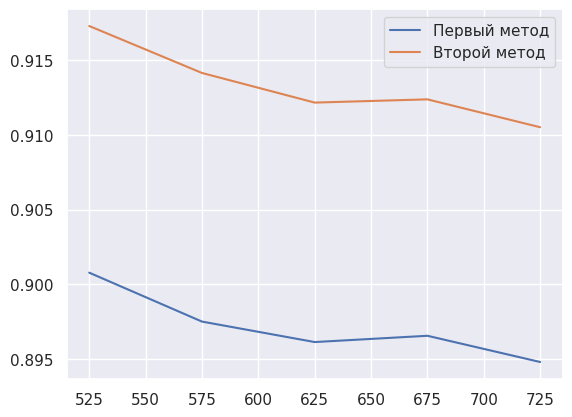

In [ ]:
plt.plot(sizes, scores_mae_first, label = "Первый метод")
plt.plot(sizes, scores_mae_second, label = "Второй метод")
plt.legend()
plt.show()

In [ ]:
PATH_TO_TEST_DATA = 'test.csv'
df_test = pd.read_csv(PATH_TO_TEST_DATA)
df_test['negative'] = df_test['negative'].apply(process_text)
df_test['positive'] = df_test['positive'].apply(process_text)
df_test.head()

,review_id,negative,positive
0,00026f564b258ad5159aab07c357c4ca,"[other, than, the, location, everything, else,...","[just, the, location]"
1,000278c73da08f4fcb857fcfe4ac6417,"[no, uk, tv, but, this, was, a, minor, point, ...","[great, location, very, comfortable, clean, br..."
2,000404f843e756fe3b2a477dbefa5bd4,"[a, tiny, noisy, room, very, deceptively, phot...","[the, breakfast, booked, the, preceding, night..."
3,000a66d32bcf305148d789ac156dd512,"[noisy, various, electrical, devices, kicking,...","[great, location, nice, bathroom]"
4,000bf1d8c5110701f459ffbedbf0d546,"[no, negative]","[great, location, and, friendly, staff]"


In [ ]:
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,"[there, were, issues, with, the, wifi, connect...","[no, positive]",7.1
1,00004d18f186bf2489590dc415876f73,"[tv, not, working]","[no, positive]",7.5
2,0000cf900cbb8667fad33a717e9b1cf4,"[more, pillows]","[beautiful, room, great, location, lovely, staff]",10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,"[very, business]",[location],5.4
4,00025e1aa3ac32edb496db49e76bbd00,"[rooms, could, do, with, a, bit, of, a, refurb...","[nice, breakfast, handy, for, victoria, train,...",6.7


Теперь попробуем обучить логистическую или линейную регрессию на любых других эмбеддингах размерности 300 и сравним качество с Word2Vec.

In [ ]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [ ]:
# Define a function to get the doc2vec vector for a list of tokens
def get_doc2vec(tokens_list, get_vector, generate_missing=False, k=300):
    # Check if the tokens list is empty
    if len(tokens_list) < 1:
        # Return a zero vector of size k
        return np.zeros(k)
    # Generate a random or zero vector for missing words
    miss_vect = np.random.rand(k) if generate_missing else np.zeros(k)
    # Infer the doc2vec vector for the tokens list
    # Use 10 epochs for the inference
    vectorized = get_vector.infer_vector(tokens_list, epochs=10)
    # Return the doc2vec vector
    return vectorized

# Define a function to get the doc2vec embeddings for a given type of data
def get_doc2vec_embeddings(vectors, data, _type, vect_size, generate_missing=False):
    # Apply the get_doc2vec function to each row of the data
    # Pass the vectors, generate_missing and k parameters
    embeddings = data[_type].apply(lambda x: get_doc2vec(x, vectors,
                                        generate_missing=generate_missing, k=vect_size))
    # Return the embeddings as a list
    return list(embeddings)

In [ ]:
tagged_data_neg=[TaggedDocument(words=_d, tags=[str(i)]) for i,_d in enumerate(df['negative'].values)]
tagged_data_pos=[TaggedDocument(words=_d, tags=[str(i)]) for i,_d in enumerate(df['positive'].values)]

In [ ]:
d2v_neg = Doc2Vec(tagged_data_neg,
                vector_size=300,
                workers=1,
                epochs=15)
d2v_pos = Doc2Vec(tagged_data_pos,
                vector_size=300,
                workers=1,
                epochs=15)

In [ ]:
sz = 300
df_d2v = df.copy()
emb_pos = get_doc2vec_embeddings(d2v_pos, df_d2v, 'positive', sz)
emb_neg = get_doc2vec_embeddings(d2v_neg, df_d2v, 'negative', sz)

In [ ]:
df_neg = pd.DataFrame(emb_neg)
df_pos = pd.DataFrame(emb_pos)
df_d2v = pd.concat([df_d2v, df_neg, df_pos], axis=1).drop(columns=['negative', 'positive'])
df_d2v.head()

,review_id,score,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,00003c6036f30f590c0ac435efb8739b,7.1,-0.071640,0.017030,0.058819,0.059008,-0.047413,-0.021999,-0.022617,0.046293,...,-0.043434,0.005841,0.029215,-0.034035,-0.023555,0.009516,-0.003591,0.010561,0.024308,-0.045151
1,00004d18f186bf2489590dc415876f73,7.5,-0.092337,-0.065821,0.081357,0.038677,-0.024367,-0.012365,0.007454,0.040221,...,-0.024366,0.002334,0.018854,-0.025141,-0.006060,0.003057,0.001075,0.005011,0.017325,-0.026334
2,0000cf900cbb8667fad33a717e9b1cf4,10.0,-0.068644,-0.033636,0.042603,0.013142,-0.026303,-0.004912,0.000632,0.009834,...,-0.100211,-0.021814,0.043251,-0.108710,-0.069641,-0.008726,0.041224,0.036708,0.053499,-0.036545
3,0000df16edf19e7ad9dd8c5cd6f6925e,5.4,-0.027759,0.016493,0.012110,-0.005252,0.007906,0.004876,-0.009288,-0.036278,...,-0.028780,-0.003193,0.009105,-0.021107,-0.011191,0.004337,0.004526,0.002389,0.022810,-0.010815
4,00025e1aa3ac32edb496db49e76bbd00,6.7,0.073781,-0.015275,-0.079036,0.184864,-0.096960,-0.053209,-0.055300,0.039526,...,-0.086048,0.103633,0.027196,-0.014210,-0.088496,0.145613,-0.053475,0.048282,0.027997,-0.080888


In [ ]:
df_train, df_valid = train_test_split(df_d2v, random_state=1412) # <- для локального тестирования
X_train = df_train.drop(columns=['score', 'review_id'])
X_valid = df_valid.drop(columns=['score', 'review_id'])
y_train = df_train['score']
y_valid = df_valid['score']

In [ ]:
lin_reg = Ridge(alpha = 0)
lin_reg.fit(X_train, y_train)
pred_valid = lin_reg.predict(X_valid)

In [ ]:
print(f'MAE: {MAE(y_valid, pred_valid)}')

MAE: 1.012852602011944


Выводы:

Word2vec сработал лучше чем Doc2vec, то есть лучше каждое слово в вектор переводить, нежели каждое предложение. При этом имеет значение размер вектора, как видно на графиках. Более того суммирование векторных представлений по предложению дало лучший результат, чем взятие среднего и чем взвешенный word2vec

Предскажем лучшей моделью тестовые данные из соревнования

### Часть 3

Воспользуемся более продвинутыми методами обработки текстовых данных. Обучим RNN/Transformer для предсказания пользовательской оценки.

Ограничим максимальную длину предложения. Некоторые отзывы могут быть слишком длинные относительно остальных.

Чтобы пользоваться DataLoader, все его элементы должны быть одинаковой размерности. Для этого добавим нулевой паддинг ко всем предложениям

In [28]:
import torch
from torch import nn
from torch.nn import functional as F
import pandas as pd


In [29]:
!pip install datasets
!pip install transformers
from transformers import BertTokenizer

In [30]:
device = torch.device("cuda")

In [31]:
df = pd.read_csv(PATH_TO_TRAIN_DATA)
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7


In [32]:
import string

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def process_text2(text):
    # print(text)
    return text.lower()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
df["sentence"] = "POSITIVE: " + df["positive"] + ' \n ' + "NEGATIVE: " + df["negative"]

In [34]:
df['sentence'] = df['sentence'].apply(process_text2)

In [35]:
df.head()

,review_id,negative,positive,score,sentence
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1,positive: no positive \n negative: there were...
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5,positive: no positive \n negative: tv not wor...
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0,positive: beautiful room great location lovel...
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4,positive: location \n negative: very business
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7,positive: nice breakfast handy for victoria t...


In [16]:
sentences = df.sentence.values
labels = df.score.values

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Define a class to create a custom dataset
class Dataset(torch.utils.data.Dataset):

    # Define the constructor method
    def __init__(self, df):
        # Store the labels as a list from the df['score'] column
        self.labels = [label for label in df['score']]
        # Store the texts as a list of tokenized tensors from the df['sentence'] column
        # Use the tokenizer function with the following parameters:
        # padding='max_length', max_length=512, truncation=True, return_tensors="pt"
        self.texts = [tokenizer(text,
                               padding='max_length', max_length=512, truncation=True,
                                return_tensors="pt") for text in df['sentence']]

    # Define a method to return the labels
    def classes(self):
        return self.labels

    # Define a method to return the length of the dataset
    def __len__(self):
        return len(self.labels)

    # Define a method to fetch a batch of labels by index
    def get_batch_labels(self, idx):
        # Convert the labels to a numpy array and return it
        return np.array(self.labels[idx])

    # Define a method to fetch a batch of texts by index
    def get_batch_texts(self, idx):
        # Return the texts as a list
        return self.texts[idx]

    # Define a method to get an item by index
    def __getitem__(self, idx):
        # Get the batch of texts by index
        batch_texts = self.get_batch_texts(idx)
        # Get the batch of labels by index
        batch_y = self.get_batch_labels(idx)
        # Return the batch of texts and labels as a tuple
        return batch_texts, batch_y

In [ ]:
df_train, df_val = train_test_split(df, random_state=1412) # <- для локального тестирования

In [ ]:
# Import the nn module from torch
from torch import nn

# Import the BertModel class from transformers
from transformers import BertModel

# Define a class to create a Bert classifier
class BertClassifier(nn.Module):

    # Define the constructor method
    def __init__(self, dropout=0.5):

        # Call the parent class constructor
        super(BertClassifier, self).__init__()

        # Create a BertModel object from the pretrained 'bert-base-cased' model
        self.bert = BertModel.from_pretrained('bert-base-cased')
        # Create a Dropout object with the given dropout rate
        self.dropout = nn.Dropout(dropout)
        # Create a Linear object with 768 input features and 1 output feature
        self.linear = nn.Linear(768, 1)
        # Uncomment the following line if you want to use a ReLU activation function
        # self.relu = nn.ReLU()

    # Define the forward method
    def forward(self, input_id, mask):

        # Get the pooled output from the BertModel
        # Ignore the first output (hidden states)
        # Do not return the dictionary
        _, pooled_output = self.bert(input_ids=input_id, attention_mask=mask, return_dict=False)
        # Apply the dropout to the pooled output
        dropout_output = self.dropout(pooled_output)
        # Apply the linear layer to the dropout output
        linear_output = self.linear(dropout_output)
        # Uncomment the following line if you want to apply the ReLU activation function
        # final_layer = self.relu(linear_output)

        # Return the linear output as the final output
        return linear_output

In [ ]:
model = BertClassifier()

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
#Заморозим чтобы не считать
for param in model.parameters():
    param.requires_grad = False

model.linear.requires_grad = True

In [ ]:
train, val = Dataset(df_train), Dataset(df_val)

BATCH_SIZE = 64

train_dataloader = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val, batch_size= BATCH_SIZE)

In [ ]:
# Import the Adam class from torch.optim
from torch.optim import Adam

# Import the tqdm function from tqdm
from tqdm import tqdm

# Define a function to train the model
def train(model, train_dataloader, val_dataloader, learning_rate, epochs):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    criterion = nn.L1Loss(reduction='sum')
    optimizer = Adam(model.parameters(), lr=learning_rate)
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:
        model = model.cuda()
        criterion = criterion.cuda()

    for epoch_num in range(epochs):
        model.train()
        total_loss_train = 0

        for train_input, train_label in tqdm(train_dataloader):
            train_label = train_label.to(device)
            mask = train_input['attention_mask'].to(device)
            input_id = train_input['input_ids'].squeeze(1).to(device)
            outputs = model(input_id, mask)
            batch_loss = criterion(outputs, train_label)
            # Set the requires_grad attribute to True for the loss tensor
            batch_loss.requires_grad = True
            total_loss_train += batch_loss.item()
            model.zero_grad()
            batch_loss.backward()
            optimizer.step()

        total_loss_val = 0
        model.eval()

        with torch.no_grad():
            for val_input, val_label in val_dataloader:
                val_label = val_label.to(device)
                mask = val_input['attention_mask'].to(device)
                input_id = val_input['input_ids'].squeeze(1).to(device)
                output = model(input_id, mask)
                batch_loss = criterion(output, val_label)
                total_loss_val += batch_loss.item()

        print(
            f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_dataloader): .3f} \
            | Val Loss: {total_loss_val / len(val_dataloader): .3f}')

EPOCHS = 3
LR = 1e-3
train(model, train_dataloader, val_dataloader, LR, EPOCHS)


  0%|          | 0/1172 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
100%|█████████▉| 1171/1172 [45:57<00:02,  2.36s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
100%|██████████| 1172/1172 [45:59<00:00,  2.35s/it]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([40])) that is different to the input size (torch.Size

Epochs: 1 | Train Loss:  37547.857             | Val Loss:  37486.678


100%|██████████| 1172/1172 [46:07<00:00,  2.36s/it]


Epochs: 2 | Train Loss:  37550.633             | Val Loss:  37486.678


100%|██████████| 1172/1172 [46:06<00:00,  2.36s/it]


Epochs: 3 | Train Loss:  37554.994             | Val Loss:  37486.678


Попробуем другой подход

In [36]:
!pip install sentence_transformers

In [37]:
from sentence_transformers import SentenceTransformer

In [38]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [39]:
emb_pos = model.encode(df['positive'], show_progress_bar=True)

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

In [40]:
emb_neg = model.encode(df['negative'], show_progress_bar=True)

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

In [45]:
emb_pos

array([[-0.0585469 , -0.0511835 ,  0.13762058, ..., -0.3331946 ,
         0.6481968 , -0.01070176],
       [-0.0585469 , -0.0511835 ,  0.13762058, ..., -0.3331946 ,
         0.6481968 , -0.01070176],
       [ 0.21543947, -0.00587229,  0.35707074, ..., -0.16983646,
        -0.6838776 ,  0.09733513],
       ...,
       [-0.22261961,  0.09355836, -0.04019597, ..., -0.44554043,
         0.5590593 ,  0.2803341 ],
       [ 0.221653  ,  0.09955098, -0.01001583, ..., -0.3086112 ,
        -0.40766025, -0.09558114],
       [ 0.3813688 , -0.19254242,  0.05596785, ...,  0.5498202 ,
        -0.6348629 , -0.03793963]], dtype=float32)

In [41]:
df_neg = pd.DataFrame(emb_neg)
df_pos = pd.DataFrame(emb_pos)

In [47]:
df_trans = df.copy()
df_trans = pd.concat([df_trans, df_neg, df_pos], axis=1).drop(columns=['negative', 'positive'])
df_trans.head()


,review_id,score,sentence,0,1,2,3,4,5,6,...,374,375,376,377,378,379,380,381,382,383
0,00003c6036f30f590c0ac435efb8739b,7.1,positive: no positive \n negative: there were...,-0.363610,-0.396542,0.579150,0.515947,0.309494,0.032681,-0.325978,...,-0.445249,-0.547774,-0.141758,0.243769,-0.070458,-0.584764,0.993387,-0.333195,0.648197,-0.010702
1,00004d18f186bf2489590dc415876f73,7.5,positive: no positive \n negative: tv not wor...,-0.014273,-0.910339,0.450052,-0.493962,0.607409,0.014887,-0.244941,...,-0.445249,-0.547774,-0.141758,0.243769,-0.070458,-0.584764,0.993387,-0.333195,0.648197,-0.010702
2,0000cf900cbb8667fad33a717e9b1cf4,10.0,positive: beautiful room great location lovel...,0.052723,0.103608,0.125905,-0.133504,-0.696885,-0.100951,-0.762080,...,-0.113945,-0.118096,0.668282,0.509616,0.043833,0.666250,0.099697,-0.169836,-0.683878,0.097335
3,0000df16edf19e7ad9dd8c5cd6f6925e,5.4,positive: location \n negative: very business,0.324266,-0.445868,-0.640411,-0.521246,-0.252512,-0.147945,0.422041,...,0.100954,-0.128977,0.005237,-0.408484,-0.156223,0.440235,-0.316606,0.200012,-0.453692,0.182562
4,00025e1aa3ac32edb496db49e76bbd00,6.7,positive: nice breakfast handy for victoria t...,0.044994,0.056317,0.029206,0.103352,-0.061212,-0.313993,-0.740396,...,-0.005209,-0.417039,0.158322,0.056426,0.697189,0.199558,0.019729,0.198103,-0.203176,0.238182


In [43]:
df_train, df_valid = train_test_split(df_trans, random_state=1412) # <- для локального тестирования

In [44]:
X_train = df_train.drop(columns=['score', 'review_id'])
X_valid = df_valid.drop(columns=['score', 'review_id'])
y_train = df_train['score']
y_valid = df_valid['score']

In [59]:
X_train = X_train.drop(columns=['sentence'])
X_valid = X_valid.drop(columns=['sentence'])


In [61]:
# Create an empty list to store the scores
scores = []

# Create an array of alpha values from 1 to 7 with 13 elements
alphas = np.linspace(1, 7, 13)


# Loop over the alpha values
for i in alphas:
    # Create a Ridge object with the current alpha value
    lin_reg = Ridge(alpha=i)
    # Fit the model on the training data
    lin_reg.fit(X_train, y_train)
    # Predict the validation data
    pred_valid = lin_reg.predict(X_valid)
    # Calculate the mean absolute error and append it to the scores list
    scores.append(MAE(y_valid, pred_valid))

# Find the index of the minimum score
best_index = np.argmin(scores)

# Find the corresponding alpha value
best_alpha = alphas[best_index]

# Print the best alpha value
print(best_alpha)

6.5


In [62]:
lin_reg = Ridge(alpha = best_alpha)
lin_reg.fit(X_train, y_train)
pred_valid = lin_reg.predict(X_valid)

In [63]:
print(f'MAE: {MAE(y_valid, pred_valid)}')

MAE: 0.858097732521057


Мы воспользовались предобученным трансформером, чтобы получить ембединги для векторов токенизированного текста https://huggingface.co/sentence-transformers/paraphrase-MiniLM-L6-v2.

Далее, как и раньше, обучим регрессию, мы получили достаточно неплохое качество

In [ ]:
PATH_TO_TEST_DATA = 'test.csv'
df_test = pd.read_csv(PATH_TO_TEST_DATA)
df_test.head()

In [65]:
df_test

,review_id,negative,positive
0,00026f564b258ad5159aab07c357c4ca,Other than the location everything else was h...,Just the location
1,000278c73da08f4fcb857fcfe4ac6417,No UK TV but this was a minor point as we wer...,Great location very comfortable clean breakfa...
2,000404f843e756fe3b2a477dbefa5bd4,A tiny noisy room VERY deceptively photographed,The breakfast booked the preceding night but ...
3,000a66d32bcf305148d789ac156dd512,Noisy various electrical devices kicking in r...,Great location Nice bathroom
4,000bf1d8c5110701f459ffbedbf0d546,No Negative,Great location and friendly staff
...,...,...,...
19995,ffe8a7190aee6e3a53ee2e0145a91555,Check in Staff not consistant with comments e...,No Positive
19996,ffea0e2b84788c9df755efe8e2bedb23,better lift access to top floor bathrooms a l...,Great location on the Piccadilly Line so easy...
19997,fff3997a85a1eed7ae7a937bc945fcf0,To add a gym and a pool Then It would be perf...,Great location very nice design great breakfa...
19998,fff673fe95ab8f3a0910f112549862e2,Room was a bit noisy you can hear cars and th...,The entrance area looks great and the ground ...


In [66]:
emb_test_pos = model.encode(df_test['positive'], show_progress_bar=True)

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

In [67]:
emb_test_neg = model.encode(df_test['negative'], show_progress_bar=True)

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

In [68]:
df_test_neg = pd.DataFrame(emb_test_neg)
df_test_pos = pd.DataFrame(emb_test_pos)

In [69]:
df_cp = df_test.copy()
df_23 = pd.concat([df_cp, df_test_neg, df_test_pos], axis=1).drop(columns=['negative', 'positive'])

In [70]:
X_test = df_23.drop(columns=['review_id'])

In [71]:
answer = pd.DataFrame()
answer['review_id'] = df_test.review_id
answer['score'] = lin_reg.predict(X_test)
answer.shape

(20000, 2)

In [72]:
answer

,review_id,score
0,00026f564b258ad5159aab07c357c4ca,4.599522
1,000278c73da08f4fcb857fcfe4ac6417,10.093367
2,000404f843e756fe3b2a477dbefa5bd4,7.288539
3,000a66d32bcf305148d789ac156dd512,7.256069
4,000bf1d8c5110701f459ffbedbf0d546,9.463722
...,...,...
19995,ffe8a7190aee6e3a53ee2e0145a91555,6.430655
19996,ffea0e2b84788c9df755efe8e2bedb23,9.330281
19997,fff3997a85a1eed7ae7a937bc945fcf0,9.599560
19998,fff673fe95ab8f3a0910f112549862e2,6.801283


In [73]:
answer.to_csv('test_3.csv', index=False)

In [74]:
from google.colab import files
files.download('test_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>